In [5]:
import requests
import matplotlib
import pandas as pd
import plotly.graph_objects as go
import pickle
#from indicators import WarrenBuffets

In [32]:
solar_company_symbols=['DQ','NOVA', 'ENPH', 'JKS', 'RUN','CSIQ', 'NVDA'] 

In [33]:
API_KEY="VUI4WTeMrT6TmC6jVj2N3XUc9vR01TpM"


In [34]:
url = "https://financialmodelingprep.com/api/v3/income-statement/NVDA?period=annual"

In [35]:
def get_financial_statements(company_symbols: list) -> list:
    responses = []
    for symbol in company_symbols:
        url ="https://financialmodelingprep.com/api/v3/income-statement/" 
        url = url + symbol + "?period=annual&apikey=" + API_KEY
        response= requests.get(url=url)
        if response.status_code == 200:
            print("Fetched Company with Symbol: " + symbol)
            responses.append(response.json())
        else:
            print("Error with Symbol " + symbol)
            print(response.status_code)
            print(response.text)
    return responses

In [36]:
solar_companies_fa = get_financial_statements(solar_company_symbols)

Fetched Company with Symbol: DQ
Fetched Company with Symbol: NOVA
Fetched Company with Symbol: ENPH
Fetched Company with Symbol: JKS
Fetched Company with Symbol: RUN
Fetched Company with Symbol: CSIQ
Fetched Company with Symbol: NVDA


In [37]:
url = "https://financialmodelingprep.com/api/v3/search?query="

for companies in solar_companies_fa:
    symbol = companies[0]['symbol']
    request = url + symbol + "&apikey=" + API_KEY
    response = requests.get(url=request)
    print(response)
    if response.status_code == 200:
        response = response.json()
        print(response)
        name = response[0]['name']
    print(name)
    for year in companies:
        year['name'] = name

<Response [200]>
[{'symbol': 'DQ', 'name': 'Daqo New Energy Corp.', 'currency': 'USD', 'stockExchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE'}, {'symbol': 'DQWS', 'name': 'DSwiss, Inc.', 'currency': 'USD', 'stockExchange': 'Other OTC', 'exchangeShortName': 'PNK'}, {'symbol': 'DQJCY', 'name': 'Pan Pacific International Holdings Corporation', 'currency': 'USD', 'stockExchange': 'Other OTC', 'exchangeShortName': 'PNK'}, {'symbol': 'DQJCF', 'name': 'Pan Pacific International Holdings Corporation', 'currency': 'USD', 'stockExchange': 'Other OTC', 'exchangeShortName': 'OTC'}, {'symbol': 'DQI.TO', 'name': 'CI WisdomTree International Quality Dividend Growth Variably Hedged Index ETF', 'currency': 'CAD', 'stockExchange': 'Toronto Stock Exchange', 'exchangeShortName': 'TSX'}, {'symbol': 'DQE.NS', 'name': 'DQ Entertainment (International) Limited', 'currency': 'INR', 'stockExchange': 'National Stock Exchange of India', 'exchangeShortName': 'NSE'}, {'symbol': 'DQD.TO', 'name': 'C

In [26]:
solar_companies_fa

[[{'date': '2023-12-31',
   'symbol': 'DQ',
   'reportedCurrency': 'USD',
   'cik': '0001477641',
   'fillingDate': '2024-04-29',
   'acceptedDate': '2024-04-29 07:16:23',
   'calendarYear': '2023',
   'period': 'FY',
   'revenue': 2307695000,
   'costOfRevenue': 1387045000,
   'grossProfit': 920650000,
   'grossProfitRatio': 0.3989478679,
   'researchAndDevelopmentExpenses': 10116000,
   'generalAndAdministrativeExpenses': 0,
   'sellingAndMarketingExpenses': 0,
   'sellingGeneralAndAdministrativeExpenses': 213241000,
   'otherExpenses': -86137000,
   'operatingExpenses': 223357000,
   'costAndExpenses': 1610402000,
   'interestIncome': 52410000,
   'interestExpense': 0,
   'depreciationAndAmortization': 148889000,
   'ebitda': 846182000,
   'ebitdaratio': 0.3666784389,
   'operatingIncome': 697293000,
   'operatingIncomeRatio': 0.3021599475,
   'totalOtherIncomeExpensesNet': 121181000,
   'incomeBeforeTax': 818474000,
   'incomeBeforeTaxRatio': 0.3546716529,
   'incomeTaxExpense': 16

#Instruments
GrossProfitMargin GPM = Gross Profit / Revenue
- \> 40% competitive advantage
- < 40% highly competitive industries
- AGPM for last 10 years

SGA Selling, General & Admission
    Management salaries, advertising, travel costs, legal fees, commissions, all payroll costs, and the like.
- as percentage of Gross Profit -> SGA / Gross Profit
- The lower the better
- SGA < 30% fantastic
- SGA 30% - 80% Ok
- SGA 100% or higher -> highly competitive
- Consistency is key!!!
    SGA = generalAndAdministrativeExpenses + sellingAndMarketingExpenses

RD Research and Development
- as percentage of Gross Profit -> RD / Gross Profit
- hight RD is a long term risk

Depreciation
- as percentage of Gross Profit -> D / GP
- lower Deprecation better
-  Coca Cola 6%
- Wrigley 7%
- GM 22% - 57%

Operating Expenses OE = SGA + RD + D

Operating Profit OP = GP - OE

Interest Expense
- as percentage of Operating Profit -> IE / OP
- the more debt a company has, the more interesest it has to pay
- little or not interest expenses is better 
- < 15% is good
- In any given Industry the company with the lowest ratio of interest payment to operating income 
    is usually the company likely to have the competitive advantage

Income Before Tax
- Calculate the income before taxes

Income Taxes Paid
- Take the number of pre-taxed operating income and deduct 35% from it -> if value doesn't match with ITP ask some questions 

Net Earnings
- as percentage of total revenue -> NE / R
- higher percentage -> better competitive advantage
- Coca Cola 21%
- Moodys 31%
- GM only 3%
- long term >20% -> some kind of competitive advantage
- <10% highly competitive
- 10% - 20% gray area

In [38]:
companies_data = dict()
for company in solar_companies_fa:
    symbol = company[0]['symbol']
    companies_data[symbol] = company

In [39]:
#pickle the files
with open('solar_companies_data.pkl', 'wb') as f:
        pickle.dump(companies_data, f)

In [29]:
# Unpickle the dictionary
with open('solar_companies_data.pkl', 'rb') as file:
    companies_data = pickle.load(file)

In [10]:
'grossProfit'
'grossProfitRatio' #x
'netIncomeRatio' #x
'sellingGeneralAndAdministrativeExpenses'
'researchAndDevelopmentExpenses'
'sgaRatio' # 'sellingGeneralAndAdministrativeExpenses' / 'grossProfit'
'randdRatio' #'researchAndDevelopmentExpenses' / 'grossProfit'
'deprecationRatio' # 'depreciationAndAmortization' / 'grossProfit'
'operatingExpenses'
'operatingIncome'
'interestExpense'
'interestExpenseRatio' # 'interestExpense' / 'operatingIncome'



'interestExpenseRatio'

In [30]:
companies_data


{'DQ': [{'date': '2023-12-31',
   'symbol': 'DQ',
   'reportedCurrency': 'USD',
   'cik': '0001477641',
   'fillingDate': '2024-04-29',
   'acceptedDate': '2024-04-29 07:16:23',
   'calendarYear': '2023',
   'period': 'FY',
   'revenue': 2307695000,
   'costOfRevenue': 1387045000,
   'grossProfit': 920650000,
   'grossProfitRatio': 0.3989478679,
   'researchAndDevelopmentExpenses': 10116000,
   'generalAndAdministrativeExpenses': 0,
   'sellingAndMarketingExpenses': 0,
   'sellingGeneralAndAdministrativeExpenses': 213241000,
   'otherExpenses': -86137000,
   'operatingExpenses': 223357000,
   'costAndExpenses': 1610402000,
   'interestIncome': 52410000,
   'interestExpense': 0,
   'depreciationAndAmortization': 148889000,
   'ebitda': 846182000,
   'ebitdaratio': 0.3666784389,
   'operatingIncome': 697293000,
   'operatingIncomeRatio': 0.3021599475,
   'totalOtherIncomeExpensesNet': 121181000,
   'incomeBeforeTax': 818474000,
   'incomeBeforeTaxRatio': 0.3546716529,
   'incomeTaxExpens

In [12]:
companies_data_short = {}

for key, item in companies_data.items():
    for year in item:
        companies_data_short[key] = [{'calendarYear': year['calendarYear'],
                                    'revenue': year['revenue'],
                                    'costOfRevenue': year['costOfRevenue'],
                                    'grossProfit': year['grossProfit'],
                                    'grossProfitRatio': year['grossProfitRatio'],
                                    'researchAndDevelopmentExpenses': year['researchAndDevelopmentExpenses'],
                                    'sellingGeneralAndAdministrativeExpenses': year['sellingGeneralAndAdministrativeExpenses'],
                                    'otherExpenses': year['otherExpenses'],
                                    'operatingExpenses': year['operatingExpenses'],
                                    'interestIncome': year['interestIncome'],
                                    'interestExpense': year['interestExpense'],
                                    'depreciationAndAmortization': year['depreciationAndAmortization'],
                                    'operatingIncome': year['operatingIncome'],
                                    'incomeBeforeTax': year['incomeBeforeTax'],
                                    'netIncome': year['netIncome'],
                                    'netIncomeRatio': year['netIncomeRatio']}
                                    for year in item]

In [13]:
#revenue, costOfRevenue, grossProfit, grossProfitRatio, researchAndDevelopmentExpenses, sellingGeneralAndAdministrativeExpenses, operatingExpenses, interestIncome, interestExpense, depreciationAndAmortization, operatingIncome, incomeBeforeTax, netIncome

In [14]:
companies_data_short

{'DQ': [{'calendarYear': '2023',
   'revenue': 2307695000,
   'costOfRevenue': 1387045000,
   'grossProfit': 920650000,
   'grossProfitRatio': 0.3989478679,
   'researchAndDevelopmentExpenses': 10116000,
   'sellingGeneralAndAdministrativeExpenses': 213241000,
   'otherExpenses': 0,
   'operatingExpenses': 223357000,
   'interestIncome': 52410000,
   'interestExpense': 0,
   'depreciationAndAmortization': 148889000,
   'operatingIncome': 697293000,
   'incomeBeforeTax': 818474000,
   'netIncome': 429545000,
   'netIncomeRatio': 0.1861359495},
  {'calendarYear': '2022',
   'revenue': 4608349000,
   'costOfRevenue': 1200428000,
   'grossProfit': 3407921000,
   'grossProfitRatio': 0.7395101803,
   'researchAndDevelopmentExpenses': 10041000,
   'sellingGeneralAndAdministrativeExpenses': 354074000,
   'otherExpenses': 3181000,
   'operatingExpenses': 367296000,
   'interestIncome': 14473000,
   'interestExpense': 14473000,
   'depreciationAndAmortization': -1790000,
   'operatingIncome': 30

In [15]:
type(companies_data_short)

dict

In [16]:
#company_data_comp =

In [17]:
df_dq = pd.DataFrame(companies_data_short['DQ'])
df_dq['company'] = 'DQ'

In [18]:
df_dq

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,interestIncome,interestExpense,depreciationAndAmortization,operatingIncome,incomeBeforeTax,netIncome,netIncomeRatio,company
0,2023,2307695000,1387045000,920650000,0.398948,10116000,213241000,0,223357000,52410000,0,148889000,697293000,818474000,429545000,0.186136,DQ
1,2022,4608349000,1200428000,3407921000,0.739510,10041000,354074000,3181000,367296000,14473000,14473000,-1790000,3040625000,3056888000,1819801000,0.394892,DQ
2,2021,1678793000,581585000,1097208000,0.653570,6495000,39904000,-609000,45790000,16469999,20482000,77468693,1051418000,1034948000,748924000,0.446109,DQ
3,2020,675602000,441610000,233992000,0.346346,6856000,39472000,-191000,46137000,907000,26632000,68686000,120076000,162130000,129195000,0.191229,DQ
4,2019,349991000,269887000,80104000,0.228874,5258000,32907000,-5546000,32619000,983000,10397000,48403000,47485000,37886000,29525000,0.084359,DQ


In [19]:
df_nova = pd.DataFrame(companies_data_short['NOVA'])
df_nova['company'] = 'NOVA'

In [20]:
df_nova

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,interestIncome,interestExpense,depreciationAndAmortization,operatingIncome,incomeBeforeTax,netIncome,netIncomeRatio,company
0,2023,720653000,427497000,293156000,0.406792,0,430422000,-3949000,523441000,115872000,371937000,181819000,-243435000,-503449000,-417961000,-0.579975,NOVA
1,2022,557690000,327077000,230613000,0.413515,0,302004000,10113000,312117000,59799000,107775000,136608000,-18615000,-126390000,-130276000,-0.233599,NOVA
2,2021,241752000,98308000,143444000,0.593352,0,204236000,-5902000,198334000,34228000,116248000,106954000,-21178000,-147250000,-147510000,-0.610171,NOVA
3,2020,160820000,65178000,95642000,0.594715,0,115148000,16272000,131420000,23741000,154580000,66066000,-10285000,-307637000,-307818000,-1.914053,NOVA
4,2019,131556000,47413000,84143000,0.639598,0,97986000,8427000,106413000,12483000,112122000,49340000,-10667000,-133434000,-255593000,-1.942846,NOVA


In [21]:
df_companies = pd.concat([df_nova, df_dq], ignore_index=True)


In [22]:
df_companies.reset_index(drop=True, inplace=True)

In [23]:
df_companies

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,interestIncome,interestExpense,depreciationAndAmortization,operatingIncome,incomeBeforeTax,netIncome,netIncomeRatio,company
0,2023,720653000,427497000,293156000,0.406792,0,430422000,-3949000,523441000,115872000,371937000,181819000,-243435000,-503449000,-417961000,-0.579975,NOVA
1,2022,557690000,327077000,230613000,0.413515,0,302004000,10113000,312117000,59799000,107775000,136608000,-18615000,-126390000,-130276000,-0.233599,NOVA
2,2021,241752000,98308000,143444000,0.593352,0,204236000,-5902000,198334000,34228000,116248000,106954000,-21178000,-147250000,-147510000,-0.610171,NOVA
3,2020,160820000,65178000,95642000,0.594715,0,115148000,16272000,131420000,23741000,154580000,66066000,-10285000,-307637000,-307818000,-1.914053,NOVA
4,2019,131556000,47413000,84143000,0.639598,0,97986000,8427000,106413000,12483000,112122000,49340000,-10667000,-133434000,-255593000,-1.942846,NOVA
5,2023,2307695000,1387045000,920650000,0.398948,10116000,213241000,0,223357000,52410000,0,148889000,697293000,818474000,429545000,0.186136,DQ
6,2022,4608349000,1200428000,3407921000,0.739510,10041000,354074000,3181000,367296000,14473000,14473000,-1790000,3040625000,3056888000,1819801000,0.394892,DQ
7,2021,1678793000,581585000,1097208000,0.653570,6495000,39904000,-609000,45790000,16469999,20482000,77468693,1051418000,1034948000,748924000,0.446109,DQ
8,2020,675602000,441610000,233992000,0.346346,6856000,39472000,-191000,46137000,907000,26632000,68686000,120076000,162130000,129195000,0.191229,DQ
9,2019,349991000,269887000,80104000,0.228874,5258000,32907000,-5546000,32619000,983000,10397000,48403000,47485000,37886000,29525000,0.084359,DQ


In [24]:
df = df_nova
df = df.sort_values(by='calendarYear', ascending=True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['calendarYear'], y=df['grossProfit'], mode='lines', name='Net Income'))

# Set title and labels
fig.update_layout(title='Net Income Over Years',
                  xaxis_title='Calendar Year',
                  yaxis_title='Net Income')

# Show the plot
fig.show()

In [25]:
#build the indicators
#Gross profit / Revenue
def grossProfitMargin(symbol: pd.DataFrame):
    symbol['gpm'] = symbol['grossProfit'] / symbol['revenue']
    return symbol

def SGAMargin(symbol: pd.DataFrame):
    symbol['sga'] = symbol['sellingGeneralAndAdministrativeExpenses'] / symbol['grossProfit'] 
    return symbol


def rad(symbol: pd.DataFrame):
    symbol['rad_profit'] = symbol['researchAndDevelopmentExpenses'] / symbol['grossProfit']
    return symbol

def deprecation(symbol: pd.DataFrame):
    symbol['dep_profit'] = symbol['depreciationAndAmortization'] / symbol['grossProfit']
    return symbol

def netincomeratio(symbol: pd.DataFrame):
    symbol['nir'] =  symbol['netIncome'] / symbol['revenue']
    return symbol

In [26]:
operatingExpenses = df_dq['researchAndDevelopmentExpenses']+ df_dq['sellingGeneralAndAdministrativeExpenses'] + df_dq['otherExpenses']

In [27]:
operatingExpenses

0    223357000
1    367296000
2     45790000
3     46137000
4     32619000
dtype: int64

In [28]:
wb = WarrenBuffets()

In [29]:
df_dq = wb.applyAll(df_dq)

In [30]:
df_dq['netIncomeRatio']

0    0.186136
1    0.394892
2    0.446109
3    0.191229
4    0.084359
Name: netIncomeRatio, dtype: float64

In [31]:
df_dq['netEarningsRatio']

0    0.186136
1    0.394892
2    0.446109
3    0.191229
4    0.084359
Name: netEarningsRatio, dtype: float64

In [32]:
df_dq

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,interestIncome,...,depreciationAndAmortization,operatingIncome,incomeBeforeTax,netIncome,netIncomeRatio,company,sgaRatio,randdRatio,deprecationRatio,netEarningsRatio
0,2023,2307695000,1387045000,920650000,0.398948,10116000,213241000,0,223357000,52410000,...,148889000,697293000,818474000,429545000,0.186136,DQ,0.231620,0.010988,0.161722,0.186136
1,2022,4608349000,1200428000,3407921000,0.739510,10041000,354074000,3181000,367296000,14473000,...,-1790000,3040625000,3056888000,1819801000,0.394892,DQ,0.103897,0.002946,-0.000525,0.394892
2,2021,1678793000,581585000,1097208000,0.653570,6495000,39904000,-609000,45790000,16469999,...,77468693,1051418000,1034948000,748924000,0.446109,DQ,0.036369,0.005920,0.070605,0.446109
3,2020,675602000,441610000,233992000,0.346346,6856000,39472000,-191000,46137000,907000,...,68686000,120076000,162130000,129195000,0.191229,DQ,0.168690,0.029300,0.293540,0.191229
4,2019,349991000,269887000,80104000,0.228874,5258000,32907000,-5546000,32619000,983000,...,48403000,47485000,37886000,29525000,0.084359,DQ,0.410803,0.065640,0.604252,0.084359


In [33]:
df_dq = grossProfitMargin(df_dq)
df_dq = SGAMargin(df_dq)
df_dq = rad(df_dq)
df_dq = deprecation(df_dq)
df_dq = netincomeratio(df_dq)

In [34]:
df_dq['grossProfit']-df_dq['operatingExpenses']

0     697293000
1    3040625000
2    1051418000
3     187855000
4      47485000
dtype: int64

In [35]:
df_dq['operatingIncome']

0     697293000
1    3040625000
2    1051418000
3     120076000
4      47485000
Name: operatingIncome, dtype: int64

In [36]:
df_dq['nir']

0    0.186136
1    0.394892
2    0.446109
3    0.191229
4    0.084359
Name: nir, dtype: float64

In [37]:
df_dq['netIncomeRatio']

0    0.186136
1    0.394892
2    0.446109
3    0.191229
4    0.084359
Name: netIncomeRatio, dtype: float64

In [38]:
df_dq = df_dq.sort_values(by='calendarYear')

<Axes: title={'center': 'Net Earnings'}, xlabel='calendarYear'>

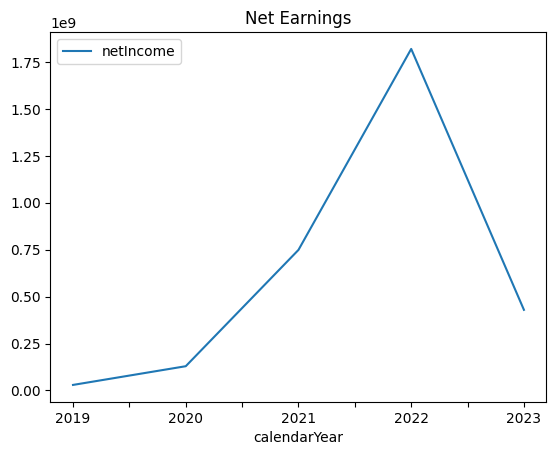

In [39]:
df_dq.plot(title="Net Earnings", y='netIncome', x='calendarYear')

In [40]:
df_dq['gpm']

4    0.228874
3    0.346346
2    0.653570
1    0.739510
0    0.398948
Name: gpm, dtype: float64

In [41]:
df_dq['grossProfitRatio']

4    0.228874
3    0.346346
2    0.653570
1    0.739510
0    0.398948
Name: grossProfitRatio, dtype: float64

<Axes: title={'center': 'Net Earnings Ratio'}, xlabel='calendarYear'>

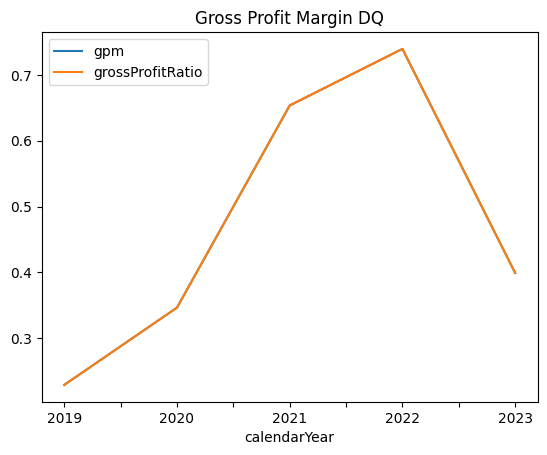

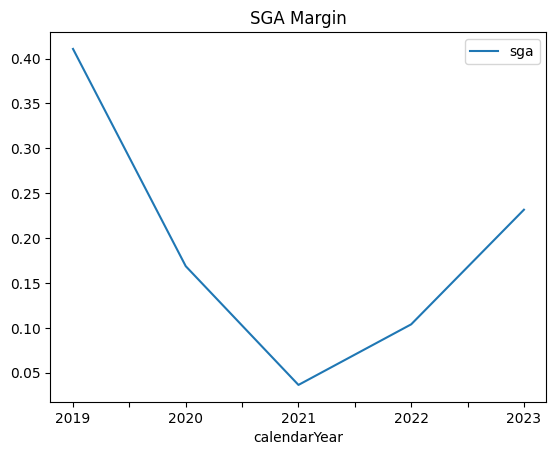

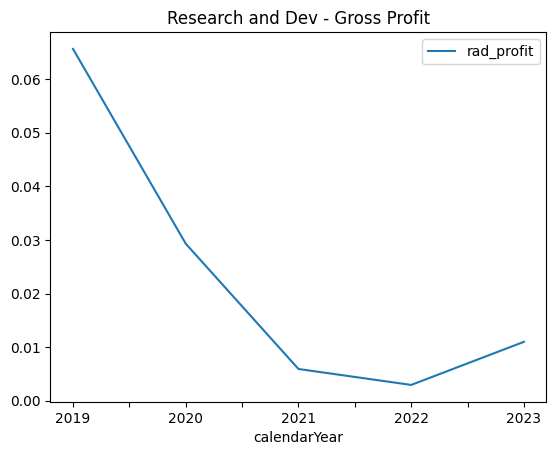

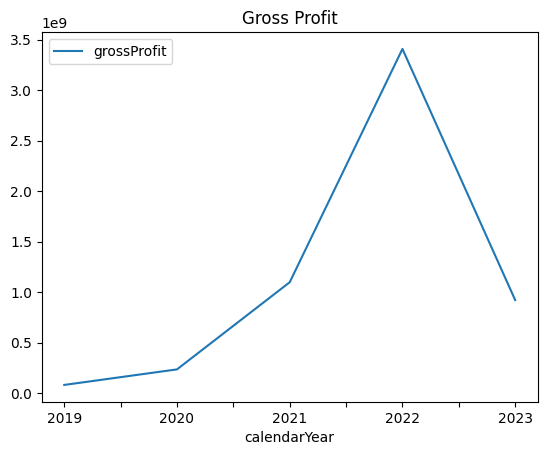

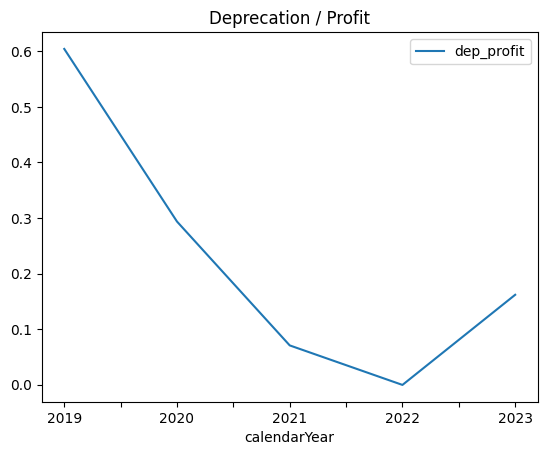

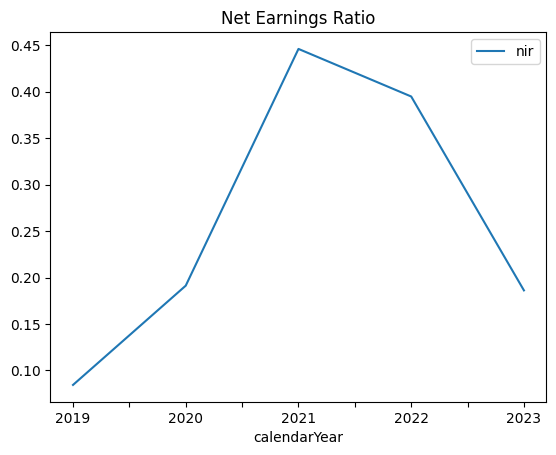

In [42]:
df_dq.plot(title="Gross Profit Margin DQ", y=['gpm','grossProfitRatio'], x='calendarYear')
df_dq.plot(title="SGA Margin", y=['sga'], x='calendarYear')
df_dq.plot(title="Research and Dev - Gross Profit", y='rad_profit', x='calendarYear')
df_dq.plot(title="Gross Profit", y='grossProfit', x='calendarYear')
df_dq.plot(title="Deprecation / Profit", y='dep_profit', x='calendarYear')
df_dq.plot(title="Net Earnings Ratio", y='nir', x='calendarYear')